<a href="https://colab.research.google.com/github/rupaltotale/CovidData/blob/master/Covid_Spread_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [4]:
!pip install statsmodels --upgrade
!pip install apyori

     |████████████████████████████████| 9.5MB 5.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
# from mlxtend.frequent_patterns import apriori, association_rules 
from apyori import apriori
import pprint
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

data_dir = "https://raw.githubusercontent.com/rupaltotale/CovidData/master/"

### Predictive models

In [2]:
df_covid_by_sex_and_age = pd.read_csv(data_dir + "Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv")
df_covid_by_sex_and_age["End Week"] = pd.to_datetime(df_covid_by_sex_and_age["End Week"])
df_covid_by_sex_and_age.head(10)

Data as of          State  ...  Total Deaths COVID-19 Deaths
0  01/13/2021  United States  ...         35007               2
1  01/13/2021  United States  ...           216               0
2  01/13/2021  United States  ...            40               0
3  01/13/2021  United States  ...            59               0
4  01/13/2021  United States  ...           370               0
5  01/13/2021  United States  ...           718               0
6  01/13/2021  United States  ...          1057               0
7  01/13/2021  United States  ...          1850               0
8  01/13/2021  United States  ...          4615               0
9  01/13/2021  United States  ...          6895               1

[10 rows x 8 columns]

In [3]:
# Get covid related stats grouped by death
df_covid_by_sex_and_age.groupby('Sex').mean()

MMWR Week  Total Deaths  COVID-19 Deaths
Sex                                              
All Sex  26.518519  10022.194444      1017.240741
Female   26.518519   4788.567901       465.734568
Male     26.518519   5233.626543       551.506173

In [4]:
def get_data_by_age_sex(age, sex):
  df = df_covid_by_sex_and_age[(df_covid_by_sex_and_age["Age Group"] == age) & (df_covid_by_sex_and_age["Sex"] == sex)].copy(deep=True)
  df['Total Covid Deaths'] = df["COVID-19 Deaths"].cumsum()
  return df

def plotTrueData(df):
  X_train = df[["End Week"]]
  y_train = df["Total Covid Deaths"]
  endog = pd.Series(y_train, index=X_train)
  df.plot.line(x="End Week", y="Total Covid Deaths")

def plotPrediction(df):
  df["End Week"] = pd.to_datetime(df["End Week"])
  endog = df.set_index(["End Week"])["Total Covid Deaths"]
  selection_res = ar_select_order(endog, 9, old_names=True, seasonal=False)
  pandas_ar_res = selection_res.model.fit()
  fig = pandas_ar_res.plot_predict(start='2020', end='2022-01-02')

      Data as of          State  ...  COVID-19 Deaths Total Covid Deaths
1773  01/13/2021  United States  ...             3224              65714
1809  01/13/2021  United States  ...             2368              68082
1845  01/13/2021  United States  ...              961              69043
1881  01/13/2021  United States  ...              812              69855
1917  01/13/2021  United States  ...              374              70229

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


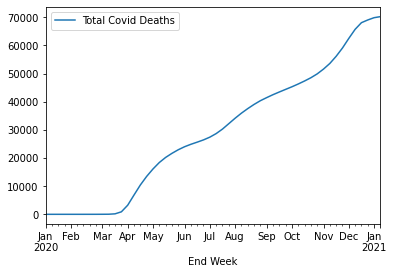

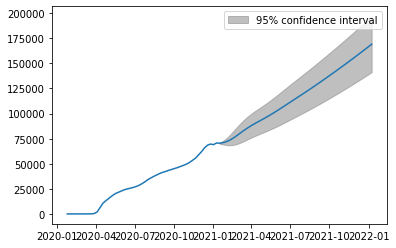

In [5]:
df_all = get_data_by_age_sex("65-74 years", "All Sex")
print(df_all.tail())
plotTrueData(df_all)
plotPrediction(df_all)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


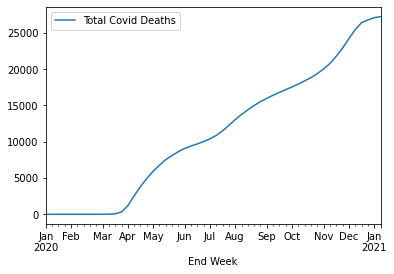

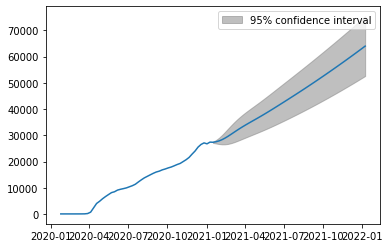

In [6]:
df_fem = get_data_by_age_sex("65-74 years", "Female")
plotTrueData(df_fem)
plotPrediction(df_fem)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


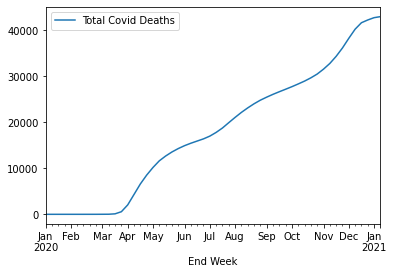

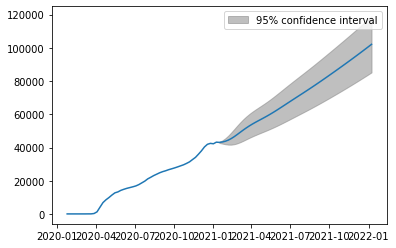

In [7]:
df_male = get_data_by_age_sex("65-74 years", "Male")
plotTrueData(df_male)
plotPrediction(df_male)

      Data as of          State  ...  COVID-19 Deaths Total Covid Deaths
1769  01/13/2021  United States  ...               53               2121
1805  01/13/2021  United States  ...               48               2169
1841  01/13/2021  United States  ...               13               2182
1877  01/13/2021  United States  ...               10               2192
1913  01/13/2021  United States  ...                4               2196

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


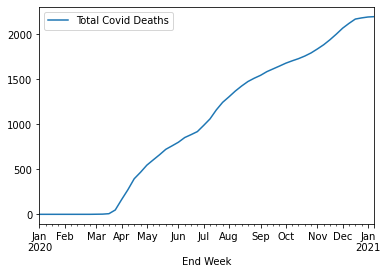

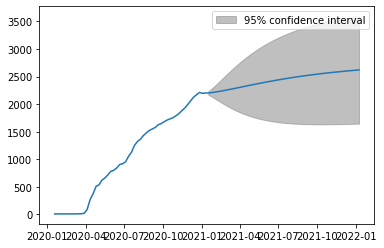

In [8]:
df_all = get_data_by_age_sex("25-34 years", "All Sex")
print(df_all.tail())
plotTrueData(df_all)
plotPrediction(df_all)

      Data as of          State  ...  COVID-19 Deaths Total Covid Deaths
1793  01/13/2021  United States  ...               20                768
1829  01/13/2021  United States  ...               15                783
1865  01/13/2021  United States  ...                6                789
1901  01/13/2021  United States  ...                6                795
1937  01/13/2021  United States  ...                0                795

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


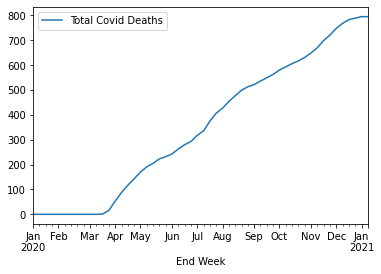

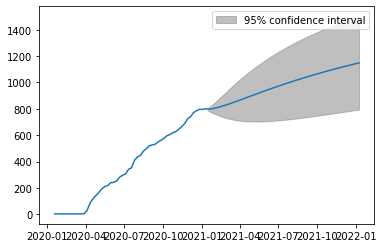

In [9]:
df_all = get_data_by_age_sex("25-34 years", "Female")
print(df_all.tail())
plotTrueData(df_all)
plotPrediction(df_all)

      Data as of          State  ...  COVID-19 Deaths Total Covid Deaths
1781  01/13/2021  United States  ...               33               1353
1817  01/13/2021  United States  ...               33               1386
1853  01/13/2021  United States  ...                7               1393
1889  01/13/2021  United States  ...                4               1397
1925  01/13/2021  United States  ...                4               1401

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


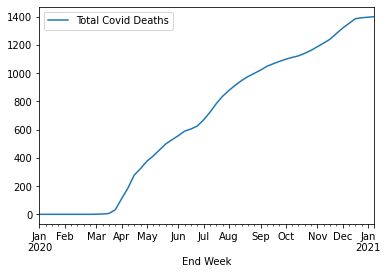

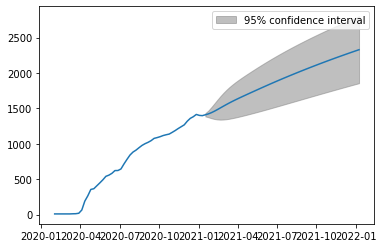

In [10]:
df_all = get_data_by_age_sex("25-34 years", "Male")
print(df_all.tail())
plotTrueData(df_all)
plotPrediction(df_all)

### Utility

In [11]:
def getCorrelation(df, col1, col2):
  _corr = df[col1].corr(df[col2])
  print("Correlation between {0: <20} and {1: >45}: {2: .2f}".format(
      col1, col2, _corr))

In [12]:
def get_bins(df, col): 
    mean = df[col].mean()
    sd = df[col].std()
    # Sometimes mean - 2 * sd can be less than 0
    # Split into 3 bins - low (0 -> mean - 0.5 std), moderate (), high
    # bins = [min(mean - 2 * sd, 0), mean - 0.5 * sd, mean + 0.5 * sd, float("inf")]

    # Split into 4 bins with each bin having the same amount of observations
    bins = df[col].quantile([0, .25, .5, .75, 1]).values
    df[col] = pd.cut(x=df[col], bins=bins, labels=["really low " + col, 
                                                   "low " + col,
                                                   "high " + col,
                                                   "really high " + col])
def categorize_numeric_factors(df, factors):
  df_num = df[factors].select_dtypes(['number'])
  for col in df_num.columns:
    get_bins(df_num, col)
  return df_num

In [13]:
def get_association_rules(df, confidence = 0.5):
  records = []
  print("Num factors:", df.shape[1])
  for i in range(0, df.shape[0]):
      records.append([str(df.values[i,j]) for j in range(0, df.shape[1])])
  association_rules = apriori(records, min_support=0.05, min_confidence=confidence, min_lift=1, min_length=2)
  return list(association_rules)

In [14]:
def print_rules(result, consequent_key):
  for record in result:
    stats = record.ordered_statistics[0]
    consequent = stats.items_add
    if (consequent_key in consequent) and len(consequent) < 2:
      print(record)
      print(stats.items_base, "-->", consequent)
      print("Support:    ", record.support)
      print("Confidence: ", stats.confidence)
      print("Lift:       ", stats.lift)
      print()

### Analysis between R values (measures spread) and factors such as age, gender, etc for US States

#### Data Collection

##### R values

In [15]:
df_r_values = pd.read_csv(data_dir + "r-values-us.csv")
df_r_values.rename({'region': 'Code'}, axis=1, inplace=True)
df_r_values.head()

Code  initial_r_0 inflection_date  ...  reopen_r    cur_date  current_r
0  USA         2.26      2020-03-15  ...      1.27  2020-10-04       1.05
1   AK         1.99      2020-03-15  ...      1.37  2020-10-04       1.13
2   AL         1.53      2020-04-02  ...      1.27  2020-10-04       0.99
3   AR         1.43      2020-04-04  ...      1.30  2020-10-04       1.04
4   AZ         1.29      2020-04-13  ...      1.41  2020-10-04       0.95

[5 rows x 8 columns]

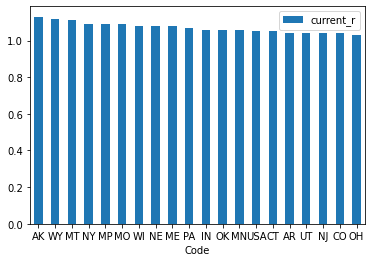

In [102]:
df_r_values.sort_values('current_r', ascending=False).head(20).plot.bar(x='Code', y='current_r', rot=0)

##### State Meta (Name to Code pairing)

In [103]:
df_state_meta = pd.read_csv(data_dir + 'stateMeta.csv')
df_state_meta.drop(['Abbrev'], axis=1, inplace=True)

##### Gender Ratio

In [104]:
df_state_gender = pd.read_csv(data_dir + 'stateGenderRatio.csv')
df_state_gender = pd.merge(df_state_meta, df_state_gender)
# Numbers indicate how many men there are per 100 women in the population
df_state_gender.head()

State Code  SexRatio
0     Alabama   AL      93.7
1      Alaska   AK     109.3
2     Arizona   AZ      98.8
3    Arkansas   AR      96.3
4  California   CA      98.8

##### Median Age

In [105]:
df_state_age = pd.read_csv(data_dir + 'stateMedianAge.csv')
df_state_age = pd.merge(df_state_meta, df_state_age)
df_state_age.head()

State Code  MedianAge  MedianAgeMale  MedianAgeFemale
0     Alabama   AL       39.0           37.5             40.5
1      Alaska   AK       34.3           33.8             34.9
2     Arizona   AZ       37.7           36.3             39.0
3    Arkansas   AR       38.1           36.8             39.5
4  California   CA       36.5           35.4             37.7

##### Population

In [106]:
df_state_pop = pd.read_csv(data_dir + 'statePop.csv')
df_state_pop = pd.merge(df_state_meta, df_state_pop)
# Numbers indicate how many men there are per 100 women in the population
df_state_pop.head()

State Code  rank  ...  growthSince2010  Percent   density
0     Alabama   AL    24  ...           0.0311   0.0147   97.4270
1      Alaska   AK    49  ...           0.0146   0.0022    1.2694
2     Arizona   AZ    14  ...           0.1737   0.0225   66.2016
3    Arkansas   AR    34  ...           0.0383   0.0091   58.3059
4  California   CA     1  ...           0.0615   0.1184  254.2929

[5 rows x 10 columns]

##### Demographics

In [107]:
df_demographics = pd.read_csv(data_dir + 'stateDemographics.csv')
df_demographics = pd.merge(df_state_meta, df_demographics)
# Numbers indicate how many men there are per 100 women in the population
df_demographics.head()

State Code  ...  Employment.Firms.Total  Employment.Firms.Women-Owned
0     Alabama   AL  ...                  382350                          28.1
1      Alaska   AK  ...                   68728                          25.9
2     Arizona   AZ  ...                  491529                          28.1
3    Arkansas   AR  ...                  238994                          24.5
4  California   CA  ...                 3425510                          30.3

[5 rows x 52 columns]

##### Merge all into one big dataset

In [108]:
df_all = pd.merge(pd.merge(pd.merge(pd.merge(df_r_values, df_state_gender), df_state_age), df_state_pop), df_demographics)
print("Num rows: {}".format(df_all.shape[0]))
print("Num cols: {}".format(df_all.shape[1]))
df_all.head()
df_all.columns

Num rows: 50
Num cols: 71


Index(['Code', 'initial_r_0', 'inflection_date', 'post_mitigation_r',
       'reopen_date', 'reopen_r', 'cur_date', 'current_r', 'State', 'SexRatio',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'rank', 'Pop',
       'Growth', 'Pop2018', 'Pop2010', 'growthSince2010', 'Percent', 'density',
       'Age.Percent 65 and Older', 'Age.Percent Under 18 Years',
       'Age.Percent Under 5 Years', 'Education.Bachelor's Degree or Higher',
       'Education.High School or Higher',
       'Employment.Nonemployer Establishments',
       'Employment.Private Non-farm Employment',
       'Employment.Private Non-farm Employment Percent Change',
       'Employment.Private Non-farm Establishments',
       'Ethnicities.American Indian and Alaska Native Alone',
       'Ethnicities.Asian Alone', 'Ethnicities.Black Alone',
       'Ethnicities.Hispanic or Latino',
       'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
       'Ethnicities.Two or More Races', 'Ethnicities.White Alone',

#### Correlation

In [109]:
getCorrelation(df_all, "current_r", "initial_r_0")
getCorrelation(df_all, "reopen_r", "current_r")
getCorrelation(df_all, "post_mitigation_r", "current_r")

Correlation between current_r            and                                   initial_r_0:  0.13
Correlation between reopen_r             and                                     current_r: -0.06
Correlation between post_mitigation_r    and                                     current_r: -0.19


In [110]:
factors = ["Pop", "density", "Growth", "SexRatio", 
           "MedianAge", "MedianAgeMale", "MedianAgeFemale", "Age.Percent 65 and Older", "Age.Percent Under 18 Years", 
           "Education.Bachelor's Degree or Higher", 
           "Ethnicities.Asian Alone", "Ethnicities.Black Alone", "Ethnicities.Hispanic or Latino", "Ethnicities.White Alone", 
           "Housing.Homeownership Rate", "Housing.Persons per Household",
           "Income.Median Houseold Income", "Income.Persons Below Poverty Level",
           "Miscellaneous.Foreign Born", "Miscellaneous.Mean Travel Time to Work",
           "Employment.Firms.American Indian-Owned", "Employment.Firms.Asian-Owned", "Employment.Firms.Black-Owned", "Employment.Firms.Hispanic-Owned"]
print(factors)

['Pop', 'density', 'Growth', 'SexRatio', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Age.Percent 65 and Older', 'Age.Percent Under 18 Years', "Education.Bachelor's Degree or Higher", 'Ethnicities.Asian Alone', 'Ethnicities.Black Alone', 'Ethnicities.Hispanic or Latino', 'Ethnicities.White Alone', 'Housing.Homeownership Rate', 'Housing.Persons per Household', 'Income.Median Houseold Income', 'Income.Persons Below Poverty Level', 'Miscellaneous.Foreign Born', 'Miscellaneous.Mean Travel Time to Work', 'Employment.Firms.American Indian-Owned', 'Employment.Firms.Asian-Owned', 'Employment.Firms.Black-Owned', 'Employment.Firms.Hispanic-Owned']


In [111]:
for factor in factors:
  getCorrelation(df_all, "current_r", factor)

Correlation between current_r            and                                           Pop: -0.18
Correlation between current_r            and                                       density: -0.04
Correlation between current_r            and                                        Growth: -0.13
Correlation between current_r            and                                      SexRatio:  0.31
Correlation between current_r            and                                     MedianAge: -0.06
Correlation between current_r            and                                 MedianAgeMale: -0.03
Correlation between current_r            and                               MedianAgeFemale: -0.08
Correlation between current_r            and                      Age.Percent 65 and Older: -0.05
Correlation between current_r            and                    Age.Percent Under 18 Years:  0.09
Correlation between current_r            and         Education.Bachelor's Degree or Higher: -0.00
Correlation between 

In [112]:
for factor in factors:
  getCorrelation(df_all, "reopen_r", factor)

Correlation between reopen_r             and                                           Pop:  0.14
Correlation between reopen_r             and                                       density: -0.24
Correlation between reopen_r             and                                        Growth:  0.20
Correlation between reopen_r             and                                      SexRatio:  0.16
Correlation between reopen_r             and                                     MedianAge: -0.32
Correlation between reopen_r             and                                 MedianAgeMale: -0.32
Correlation between reopen_r             and                               MedianAgeFemale: -0.31
Correlation between reopen_r             and                      Age.Percent 65 and Older: -0.07
Correlation between reopen_r             and                    Age.Percent Under 18 Years:  0.28
Correlation between reopen_r             and         Education.Bachelor's Degree or Higher: -0.42
Correlation between 

In [113]:
for factor in factors:
  getCorrelation(df_all, "post_mitigation_r", factor)

Correlation between post_mitigation_r    and                                           Pop:  0.29
Correlation between post_mitigation_r    and                                       density:  0.05
Correlation between post_mitigation_r    and                                        Growth:  0.40
Correlation between post_mitigation_r    and                                      SexRatio: -0.39
Correlation between post_mitigation_r    and                                     MedianAge: -0.15
Correlation between post_mitigation_r    and                                 MedianAgeMale: -0.17
Correlation between post_mitigation_r    and                               MedianAgeFemale: -0.13
Correlation between post_mitigation_r    and                      Age.Percent 65 and Older: -0.04
Correlation between post_mitigation_r    and                    Age.Percent Under 18 Years:  0.23
Correlation between post_mitigation_r    and         Education.Bachelor's Degree or Higher: -0.13
Correlation between 

In [114]:
for factor in factors:
  getCorrelation(df_all, "initial_r_0", factor)

Correlation between initial_r_0          and                                           Pop:  0.27
Correlation between initial_r_0          and                                       density:  0.36
Correlation between initial_r_0          and                                        Growth: -0.22
Correlation between initial_r_0          and                                      SexRatio: -0.26
Correlation between initial_r_0          and                                     MedianAge: -0.02
Correlation between initial_r_0          and                                 MedianAgeMale: -0.04
Correlation between initial_r_0          and                               MedianAgeFemale: -0.00
Correlation between initial_r_0          and                      Age.Percent 65 and Older: -0.17
Correlation between initial_r_0          and                    Age.Percent Under 18 Years: -0.05
Correlation between initial_r_0          and         Education.Bachelor's Degree or Higher:  0.23
Correlation between 

#### Association rules

In [16]:
factors = ["Pop", "density",  "SexRatio", 
           "MedianAge",  
           "Miscellaneous.Mean Travel Time to Work",
           "Income.Median Houseold Income",
           "Education.Bachelor's Degree or Higher", 
           "Income.Persons Below Poverty Level",
           "Ethnicities.Black Alone", 
           "Ethnicities.Hispanic or Latino", "Ethnicities.White Alone",
           "Miscellaneous.Foreign Born"]
print(len(factors))

12


##### Initial r0

In [123]:
df = categorize_numeric_factors(df_all, factors + ["initial_r_0"])
print(df["initial_r_0"].value_counts())
df

really high initial_r_0    13
high initial_r_0           12
low initial_r_0            12
really low initial_r_0     12
Name: initial_r_0, dtype: int64


Pop  ...              initial_r_0
0    really low Pop  ...         high initial_r_0
1          high Pop  ...          low initial_r_0
2           low Pop  ...   really low initial_r_0
3          high Pop  ...   really low initial_r_0
4   really high Pop  ...          low initial_r_0
5          high Pop  ...                      NaN
6           low Pop  ...  really high initial_r_0
7    really low Pop  ...   really low initial_r_0
8   really high Pop  ...          low initial_r_0
9   really high Pop  ...  really high initial_r_0
10   really low Pop  ...  really high initial_r_0
11          low Pop  ...   really low initial_r_0
12   really low Pop  ...  really high initial_r_0
13  really high Pop  ...  really high initial_r_0
14         high Pop  ...          low initial_r_0
15          low Pop  ...   really low initial_r_0
16          low Pop  ...         high initial_r_0
17         high Pop  ...  really high initial_r_0
18         high Pop  ...  really high initial_r_0
19         high Pop  ...         high initial_r_0
20   really low Pop  ...          low initial_r_0
21  really high Pop  ...         high initial_r_0
22         high Pop  ...  really high initial_r_0
23         high Pop  ...         high initial_r_0
24          low Pop  ...   really low initial_r_0
25   really low Pop  ...   really low initial_r_0
26  really high Pop  ...  really high initial_r_0
27   really low Pop  ...   really low initial_r_0
28          low Pop  ...  really high initial_r_0
29   really low Pop  ...   really low initial_r_0
30  really high Pop  ...  really high initial_r_0
31          low Pop  ...   really low initial_r_0
32          low Pop  ...         high initial_r_0
33  really high Pop  ...  really high initial_r_0
34  really high Pop  ...          low initial_r_0
35          low Pop  ...         high initial_r_0
36          low Pop  ...          low initial_r_0
37  really high Pop  ...         high initial_r_0
38   really low Pop  ...          low initial_r_0
39         high Pop  ...         high initial_r_0
40   really low Pop  ...   really low initial_r_0
41         high Pop  ...         high initial_r_0
42  really high Pop  ...         high initial_r_0
43          low Pop  ...          low initial_r_0
44  really high Pop  ...          low initial_r_0
45   really low Pop  ...         high initial_r_0
46  really high Pop  ...          low initial_r_0
47         high Pop  ...  really high initial_r_0
48   really low Pop  ...   really low initial_r_0
49              NaN  ...          low initial_r_0

[50 rows x 13 columns]

In [122]:
association_results = get_association_rules(df, 0.7)

Num factors: 13


In [124]:
print_rules(association_results, "really low initial_r_0")

RelationRecord(items=frozenset({'really low density', 'high Ethnicities.White Alone', 'really low initial_r_0'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really low density', 'high Ethnicities.White Alone'}), items_add=frozenset({'really low initial_r_0'}), confidence=1.0, lift=4.166666666666667), OrderedStatistic(items_base=frozenset({'high Ethnicities.White Alone', 'really low initial_r_0'}), items_add=frozenset({'really low density'}), confidence=0.75, lift=3.125)])
frozenset({'really low density', 'high Ethnicities.White Alone'}) --> frozenset({'really low initial_r_0'})
Support:     0.06
Confidence:  1.0
Lift:        4.166666666666667

RelationRecord(items=frozenset({'high Miscellaneous.Mean Travel Time to Work', 'really low initial_r_0', 'nan'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high Miscellaneous.Mean Travel Time to Work', 'nan'}), items_add=frozenset({'really low initial_r_0'}), confidence=0.75, lift=3.1

In [120]:
print_rules(association_results, "low initial_r_0")

RelationRecord(items=frozenset({'low initial_r_0', 'low Miscellaneous.Mean Travel Time to Work', 'high Ethnicities.White Alone'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'low Miscellaneous.Mean Travel Time to Work', 'high Ethnicities.White Alone'}), items_add=frozenset({'low initial_r_0'}), confidence=0.5, lift=2.0833333333333335), OrderedStatistic(items_base=frozenset({'low initial_r_0', 'high Ethnicities.White Alone'}), items_add=frozenset({'low Miscellaneous.Mean Travel Time to Work'}), confidence=1.0, lift=4.166666666666667), OrderedStatistic(items_base=frozenset({'low Miscellaneous.Mean Travel Time to Work', 'low initial_r_0'}), items_add=frozenset({'high Ethnicities.White Alone'}), confidence=0.6, lift=2.5)])
frozenset({'low Miscellaneous.Mean Travel Time to Work', 'high Ethnicities.White Alone'}) --> frozenset({'low initial_r_0'})
Support:     0.06
Confidence:  0.5
Lift:        2.0833333333333335

RelationRecord(items=frozenset({'low initial_r_0

In [125]:
print_rules(association_results, "high initial_r_0")

RelationRecord(items=frozenset({'high initial_r_0', 'high Income.Median Houseold Income', 'high Ethnicities.Black Alone'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high Income.Median Houseold Income', 'high Ethnicities.Black Alone'}), items_add=frozenset({'high initial_r_0'}), confidence=0.75, lift=3.125), OrderedStatistic(items_base=frozenset({'high initial_r_0', 'high Income.Median Houseold Income'}), items_add=frozenset({'high Ethnicities.Black Alone'}), confidence=0.75, lift=3.125)])
frozenset({'high Income.Median Houseold Income', 'high Ethnicities.Black Alone'}) --> frozenset({'high initial_r_0'})
Support:     0.06
Confidence:  0.75
Lift:        3.125

RelationRecord(items=frozenset({'high initial_r_0', 'high Miscellaneous.Mean Travel Time to Work', 'high Ethnicities.Black Alone'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high Miscellaneous.Mean Travel Time to Work', 'high Ethnicities.Black Alone'}), items_add=fr

In [126]:
print_rules(association_results, "really high initial_r_0")

RelationRecord(items=frozenset({'really high initial_r_0', 'high Ethnicities.Black Alone', "really high Education.Bachelor's Degree or Higher"}), support=0.08, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high Ethnicities.Black Alone', "really high Education.Bachelor's Degree or Higher"}), items_add=frozenset({'really high initial_r_0'}), confidence=1.0, lift=3.846153846153846), OrderedStatistic(items_base=frozenset({'high Ethnicities.Black Alone', 'really high initial_r_0'}), items_add=frozenset({"really high Education.Bachelor's Degree or Higher"}), confidence=1.0, lift=3.846153846153846)])
frozenset({'high Ethnicities.Black Alone', "really high Education.Bachelor's Degree or Higher"}) --> frozenset({'really high initial_r_0'})
Support:     0.08
Confidence:  1.0
Lift:        3.846153846153846

RelationRecord(items=frozenset({'really high Income.Median Houseold Income', 'high Ethnicities.Black Alone', 'really high initial_r_0'}), support=0.06, ordered_statistics=[Ordere

##### Current r

In [129]:
df = categorize_numeric_factors(df_all, factors + ["current_r"])
print(df["current_r"].value_counts())
df

really low current_r     14
really high current_r    13
low current_r            13
high current_r            9
Name: current_r, dtype: int64


Pop  ...              current_r
0    really low Pop  ...  really high current_r
1          high Pop  ...   really low current_r
2           low Pop  ...         high current_r
3          high Pop  ...   really low current_r
4   really high Pop  ...   really low current_r
5          high Pop  ...         high current_r
6           low Pop  ...  really high current_r
7    really low Pop  ...          low current_r
8   really high Pop  ...          low current_r
9   really high Pop  ...   really low current_r
10   really low Pop  ...   really low current_r
11          low Pop  ...          low current_r
12   really low Pop  ...          low current_r
13  really high Pop  ...          low current_r
14         high Pop  ...  really high current_r
15          low Pop  ...         high current_r
16          low Pop  ...          low current_r
17         high Pop  ...   really low current_r
18         high Pop  ...         high current_r
19         high Pop  ...          low current_r
20   really low Pop  ...  really high current_r
21  really high Pop  ...          low current_r
22         high Pop  ...  really high current_r
23         high Pop  ...  really high current_r
24          low Pop  ...   really low current_r
25   really low Pop  ...  really high current_r
26  really high Pop  ...          low current_r
27   really low Pop  ...          low current_r
28          low Pop  ...  really high current_r
29   really low Pop  ...         high current_r
30  really high Pop  ...         high current_r
31          low Pop  ...   really low current_r
32          low Pop  ...   really low current_r
33  really high Pop  ...  really high current_r
34  really high Pop  ...         high current_r
35          low Pop  ...  really high current_r
36          low Pop  ...          low current_r
37  really high Pop  ...  really high current_r
38   really low Pop  ...   really low current_r
39         high Pop  ...   really low current_r
40   really low Pop  ...         high current_r
41         high Pop  ...   really low current_r
42  really high Pop  ...   really low current_r
43          low Pop  ...         high current_r
44  really high Pop  ...   really low current_r
45   really low Pop  ...                    NaN
46  really high Pop  ...          low current_r
47         high Pop  ...  really high current_r
48   really low Pop  ...          low current_r
49              NaN  ...  really high current_r

[50 rows x 13 columns]

In [130]:
association_results = get_association_rules(df, 0.7)

Num factors: 13


In [131]:
print_rules(association_results, "really low current_r")

RelationRecord(items=frozenset({"high Education.Bachelor's Degree or Higher", 'really high Miscellaneous.Mean Travel Time to Work', 'really low current_r'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({"high Education.Bachelor's Degree or Higher", 'really high Miscellaneous.Mean Travel Time to Work'}), items_add=frozenset({'really low current_r'}), confidence=0.75, lift=2.6785714285714284), OrderedStatistic(items_base=frozenset({"high Education.Bachelor's Degree or Higher", 'really low current_r'}), items_add=frozenset({'really high Miscellaneous.Mean Travel Time to Work'}), confidence=1.0, lift=3.846153846153846), OrderedStatistic(items_base=frozenset({'really high Miscellaneous.Mean Travel Time to Work', 'really low current_r'}), items_add=frozenset({"high Education.Bachelor's Degree or Higher"}), confidence=0.75, lift=3.125)])
frozenset({"high Education.Bachelor's Degree or Higher", 'really high Miscellaneous.Mean Travel Time to Work'}) --> frozenset({'r

In [132]:
print_rules(association_results, "low current_r")

RelationRecord(items=frozenset({'low current_r', 'low SexRatio', 'low Ethnicities.White Alone'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'low SexRatio', 'low Ethnicities.White Alone'}), items_add=frozenset({'low current_r'}), confidence=0.75, lift=2.8846153846153846), OrderedStatistic(items_base=frozenset({'low current_r', 'low Ethnicities.White Alone'}), items_add=frozenset({'low SexRatio'}), confidence=0.75, lift=3.125), OrderedStatistic(items_base=frozenset({'low current_r', 'low SexRatio'}), items_add=frozenset({'low Ethnicities.White Alone'}), confidence=0.75, lift=3.125)])
frozenset({'low SexRatio', 'low Ethnicities.White Alone'}) --> frozenset({'low current_r'})
Support:     0.06
Confidence:  0.75
Lift:        2.8846153846153846

RelationRecord(items=frozenset({'low MedianAge', 'low current_r', 'low Income.Persons Below Poverty Level'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'low MedianAge', 'low Income.Persons

In [133]:
print_rules(association_results, "high current_r")

In [134]:
print_rules(association_results, "really high current_r")

RelationRecord(items=frozenset({'really high current_r', "high Education.Bachelor's Degree or Higher", 'really high MedianAge'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({"high Education.Bachelor's Degree or Higher", 'really high MedianAge'}), items_add=frozenset({'really high current_r'}), confidence=0.75, lift=2.8846153846153846), OrderedStatistic(items_base=frozenset({'really high current_r', 'really high MedianAge'}), items_add=frozenset({"high Education.Bachelor's Degree or Higher"}), confidence=0.75, lift=3.125)])
frozenset({"high Education.Bachelor's Degree or Higher", 'really high MedianAge'}) --> frozenset({'really high current_r'})
Support:     0.06
Confidence:  0.75
Lift:        2.8846153846153846

RelationRecord(items=frozenset({'high Ethnicities.White Alone', 'really high current_r', 'high Ethnicities.Black Alone'}), support=0.06, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high Ethnicities.White Alone', 'high Ethnicities.Bla

### Analysis between R values and factors such as population for US counties
[Reference: Estimating and explaining the spread of COVID-19 at the county level in the USA](https://www.nature.com/articles/s42003-020-01609-6#data-availability)

In [148]:
df_county = pd.read_csv(data_dir + "countyDataWithR0Estimates.csv")
print("Rows:", df_county.shape[0])
print("Cols:", df_county.shape[1])
df_county.head()

Rows: 160
Cols: 99


X state_county    fips  ...      pop         den region
0  3030       AL_agg     NaN  ...  4489975   34.139991  South
1   642    AL_Mobile  1097.0  ...   413210   97.036236  South
2  3022       AR_agg     NaN  ...  3017804   21.909149  South
3  2987       AZ_agg     NaN  ...  1746024    7.052300   West
4     4  AZ_Maricopa  4013.0  ...  4485414  187.734748   West

[5 rows x 99 columns]

#### Correlation

In [149]:
factors = ["Less_Than_High_School", "At_Least_Bachelor_Degree.AHDP", 
           "Median_Earnings.AHDP",	"Education_Index",	"Income_Index",	
           "White.AHDP",	"African_American",	"Native_American", "Asian_American",
           "Other_race",	"Latino_Population",	"Children_in_Poverty", 
           "Adults_65_Poverty.AHDP",	"Population.Census2019",	
           "Below_federal_poverty_threshold.AHDP",	"Gini_Coefficient.AHDP",
           "Child_Poverty",	"Professional_occupations",	"Service_occupations",	
           "Sales_office_occupations",	"Farming_occupations",	
           "Construction_occupations",	"Production_occupations", "Smoker",
           "Obesity.MA", "Diabetes", "pTrump", "area", "Elderly_Population.MA"]
print(factors)

['Less_Than_High_School', 'At_Least_Bachelor_Degree.AHDP', 'Median_Earnings.AHDP', 'Education_Index', 'Income_Index', 'White.AHDP', 'African_American', 'Native_American', 'Asian_American', 'Other_race', 'Latino_Population', 'Children_in_Poverty', 'Adults_65_Poverty.AHDP', 'Population.Census2019', 'Below_federal_poverty_threshold.AHDP', 'Gini_Coefficient.AHDP', 'Child_Poverty', 'Professional_occupations', 'Service_occupations', 'Sales_office_occupations', 'Farming_occupations', 'Construction_occupations', 'Production_occupations', 'Smoker', 'Obesity.MA', 'Diabetes', 'pTrump', 'area', 'Elderly_Population.MA']


In [150]:
for factor in factors:
  getCorrelation(df_county, "r0", factor)

Correlation between r0                   and                         Less_Than_High_School:  0.14
Correlation between r0                   and                 At_Least_Bachelor_Degree.AHDP:  0.10
Correlation between r0                   and                          Median_Earnings.AHDP:  0.17
Correlation between r0                   and                               Education_Index:  0.11
Correlation between r0                   and                                  Income_Index:  0.16
Correlation between r0                   and                                    White.AHDP: -0.16
Correlation between r0                   and                              African_American:  0.08
Correlation between r0                   and                               Native_American: -0.13
Correlation between r0                   and                                Asian_American:  0.17
Correlation between r0                   and                                    Other_race:  0.02
Correlation between 

#### Association rules

In [151]:
factors = ["Less_Than_High_School",
           "Median_Earnings.AHDP",
           "White.AHDP",	
           "African_American",	
           "Native_American", 
           "Asian_American",
           "Latino_Population",	
           "Adults_65_Poverty.AHDP",	
           "Population.Census2019",	
           "Gini_Coefficient.AHDP",
           "Professional_occupations",	
           "Service_occupations",	
           "Sales_office_occupations",	
           "Construction_occupations",
           "Smoker",
           "Obesity.MA"]
print(len(factors))

16


In [152]:
df = categorize_numeric_factors(df_county, factors + ["r0"])
print(df["r0"].value_counts())
df

really high r0    40
high r0           40
low r0            40
really low r0     39
Name: r0, dtype: int64


Less_Than_High_School  ...             r0
0    really high Less_Than_High_School  ...         low r0
1    really high Less_Than_High_School  ...  really low r0
2    really high Less_Than_High_School  ...  really low r0
3    really high Less_Than_High_School  ...         low r0
4           high Less_Than_High_School  ...         low r0
..                                 ...  ...            ...
155          low Less_Than_High_School  ...        high r0
156   really low Less_Than_High_School  ...         low r0
157   really low Less_Than_High_School  ...  really low r0
158   really low Less_Than_High_School  ...        high r0
159         high Less_Than_High_School  ...        high r0

[160 rows x 17 columns]

In [158]:
association_results = get_association_rules(df, 0.6)

Num factors: 17


In [159]:
print_rules(association_results, "really low r0")

RelationRecord(items=frozenset({'high African_American', 'really low r0', 'low Gini_Coefficient.AHDP'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high African_American', 'low Gini_Coefficient.AHDP'}), items_add=frozenset({'really low r0'}), confidence=0.6153846153846154, lift=2.52465483234714), OrderedStatistic(items_base=frozenset({'high African_American', 'really low r0'}), items_add=frozenset({'low Gini_Coefficient.AHDP'}), confidence=0.6666666666666667, lift=2.0915032679738568)])
frozenset({'high African_American', 'low Gini_Coefficient.AHDP'}) --> frozenset({'really low r0'})
Support:     0.05
Confidence:  0.6153846153846154
Lift:        2.52465483234714

RelationRecord(items=frozenset({'high African_American', 'really low Population.Census2019', 'really low r0'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high African_American', 'really low Population.Census2019'}), items_add=frozenset({'really low r0'}), confidence

In [160]:
print_rules(association_results, "low r0")

In [161]:
print_rules(association_results, "high r0")

In [162]:
print_rules(association_results, "really high r0")

RelationRecord(items=frozenset({'high African_American', 'really high r0', 'high Population.Census2019'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high African_American', 'high Population.Census2019'}), items_add=frozenset({'really high r0'}), confidence=0.6153846153846154, lift=2.4615384615384617)])
frozenset({'high African_American', 'high Population.Census2019'}) --> frozenset({'really high r0'})
Support:     0.05
Confidence:  0.6153846153846154
Lift:        2.4615384615384617

RelationRecord(items=frozenset({'high African_American', 'low White.AHDP', 'really high r0'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({'high African_American', 'low White.AHDP'}), items_add=frozenset({'really high r0'}), confidence=0.6153846153846154, lift=2.4615384615384617), OrderedStatistic(items_base=frozenset({'low White.AHDP', 'really high r0'}), items_add=frozenset({'high African_American'}), confidence=0.6666666666666667, lift=2.666666

### Analysis between deaths and factors such as population for ALL US counties

#### Data Collection and cleaning

In [18]:
df_counties_covid = pd.read_csv(data_dir + "/county/us-counties-recent.csv")
df_counties_education = pd.read_csv(data_dir + "/county/Education.csv", thousands=',')
df_counties_pop = pd.read_csv(data_dir + "/county/PopulationEstimates.csv", thousands=',')
df_counties_poverty = pd.read_csv(data_dir + "/county/PovertyEstimates.csv", thousands=',')
df_counties_emplyoment = pd.read_csv(data_dir + "/county/Unemployment.csv", thousands=',')
df_counties_medicare = pd.read_csv(data_dir + "/county/medicare_data.csv", thousands=',')
df_counties_mask = pd.read_csv(data_dir + "/county/mask-use-by-county.csv", thousands=',')
df_counties_race = pd.read_csv(data_dir + "/county/race_data.csv", thousands=',')
df_counties_race = df_counties_race[df_counties_race["year"] == 2019]
df_counties_race.head()

fips  STFIPS  COFIPS  ... two_pop not_hisp_pop hisp_pop
9   1001       1       1  ...    1045        54198     1671
19  1003       1       3  ...    4167       212700    10534
29  1005       1       5  ...     308        23569     1117
39  1007       1       7  ...     263        21771      623
49  1009       1       9  ...     814        52244     5582

[5 rows x 16 columns]

In [20]:
df_counties_covid = df_counties_covid[df_counties_covid["date"] == '3/2/21']
df_all = df_counties_covid
for df in [df_counties_education, df_counties_pop, df_counties_poverty, 
           df_counties_emplyoment, df_counties_medicare, df_counties_race,
           df_counties_mask]:
  df_all = pd.merge(df_all, df, on="fips")
print("Num rows: {}".format(df_all.shape[0]))
print("Num cols: {}".format(df_all.shape[1]))
print('\n'.join(list(df_all.columns)))
df_all.head()

Num rows: 3129
Num cols: 372
date
county_x
state_x
fips
cases
deaths
State_x
Area name
2003 Rural-urban Continuum Code
2003 Urban Influence Code
2013 Rural-urban Continuum Code
2013 Urban Influence Code
Less than a high school diploma, 1970
High school diploma only, 1970
Some college (1-3 years), 1970
Four years of college or higher, 1970
Percent of adults with less than a high school diploma, 1970
Percent of adults with a high school diploma only, 1970
Percent of adults completing some college (1-3 years), 1970
Percent of adults completing four years of college or higher, 1970
Less than a high school diploma, 1980
High school diploma only, 1980
Some college (1-3 years), 1980
Four years of college or higher, 1980
Percent of adults with less than a high school diploma, 1980
Percent of adults with a high school diploma only, 1980
Percent of adults completing some college (1-3 years), 1980
Percent of adults completing four years of college or higher, 1980
Less than a high school diploma, 

date county_x  state_x    fips  ...  RARELY  SOMETIMES FREQUENTLY ALWAYS
0  3/2/21  Autauga  Alabama  1001.0  ...   0.074      0.134      0.295  0.444
1  3/2/21  Baldwin  Alabama  1003.0  ...   0.059      0.098      0.323  0.436
2  3/2/21  Barbour  Alabama  1005.0  ...   0.121      0.120      0.201  0.491
3  3/2/21     Bibb  Alabama  1007.0  ...   0.034      0.096      0.278  0.572
4  3/2/21   Blount  Alabama  1009.0  ...   0.114      0.180      0.194  0.459

[5 rows x 372 columns]

#### Correlation

In [33]:
factors = ["Median_Household_Income_2019", 
           "Unemployment_rate_2019", "Bachelor's degree or higher, 2000", 
           "INTERNATIONAL_MIG_2019",
           "DOMESTIC_MIG_2019", "GQ_ESTIMATES_2019", "R_death_2019", 
           "POP_ESTIMATE_2019", 
           "Percent of adults with a high school diploma only, 2015-19", 
           "N_POP_CHG_2019", "POVALL_2019", "Civilian_labor_force_2019",
           "Med_HH_Income_Percent_of_State_Total_2019", 
           "hisp_pop", "black_pop", "white_pop", "Medicare enrollees (2014)",
           "2013 Urban Influence Code",
           "NEVER", "RARELY", "SOMETIMES", "FREQUENTLY", "ALWAYS"]
df_all[factors].head()

Median_Household_Income_2019  Unemployment_rate_2019  ...  FREQUENTLY  ALWAYS
0                       58233.0                     2.7  ...       0.295   0.444
1                       59871.0                     2.7  ...       0.323   0.436
2                       35972.0                     3.8  ...       0.201   0.491
3                       47918.0                     3.1  ...       0.278   0.572
4                       52902.0                     2.7  ...       0.194   0.459

[5 rows x 23 columns]

In [22]:
# Normalize data to be independent of population size
for factor in ["deaths", "cases", "Bachelor's degree or higher, 2000", "R_death_2019", 
               "POVALL_2019", "Civilian_labor_force_2019", 
               "hisp_pop", "black_pop", "white_pop", "Medicare enrollees (2014)"]:
  df_all[factor] = df_all[factor] / df_all["POP_ESTIMATE_2019"]
df_all[factors].head()

Median_Household_Income_2019  Unemployment_rate_2019  ...  FREQUENTLY  ALWAYS
0                       58233.0                     2.7  ...       0.295   0.444
1                       59871.0                     2.7  ...       0.323   0.436
2                       35972.0                     3.8  ...       0.201   0.491
3                       47918.0                     3.1  ...       0.278   0.572
4                       52902.0                     2.7  ...       0.194   0.459

[5 rows x 22 columns]

In [34]:
for factor in factors:
  getCorrelation(df_all, "deaths", factor)

Correlation between deaths               and                  Median_Household_Income_2019: -0.32
Correlation between deaths               and                        Unemployment_rate_2019:  0.09
Correlation between deaths               and             Bachelor's degree or higher, 2000: -0.19
Correlation between deaths               and                        INTERNATIONAL_MIG_2019: -0.04
Correlation between deaths               and                             DOMESTIC_MIG_2019: -0.05
Correlation between deaths               and                             GQ_ESTIMATES_2019: -0.07
Correlation between deaths               and                                  R_death_2019:  0.14
Correlation between deaths               and                             POP_ESTIMATE_2019: -0.07
Correlation between deaths               and Percent of adults with a high school diploma only, 2015-19:  0.23
Correlation between deaths               and                                N_POP_CHG_2019: -0.11
Correla

In [35]:
for factor in factors:
  getCorrelation(df_all, "cases", factor)

Correlation between cases                and                  Median_Household_Income_2019: -0.20
Correlation between cases                and                        Unemployment_rate_2019: -0.05
Correlation between cases                and             Bachelor's degree or higher, 2000: -0.23
Correlation between cases                and                        INTERNATIONAL_MIG_2019: -0.02
Correlation between cases                and                             DOMESTIC_MIG_2019: -0.03
Correlation between cases                and                             GQ_ESTIMATES_2019: -0.03
Correlation between cases                and                                  R_death_2019: -0.00
Correlation between cases                and                             POP_ESTIMATE_2019: -0.04
Correlation between cases                and Percent of adults with a high school diploma only, 2015-19:  0.14
Correlation between cases                and                                N_POP_CHG_2019: -0.03
Correla

#### Association rules

##### Deaths

In [169]:
# Limit to fewer factors for better results
factors = ["Median_Household_Income_2019", 
           "Unemployment_rate_2019", 
           "Bachelor's degree or higher, 2000", 
           "INTERNATIONAL_MIG_2019",
           "DOMESTIC_MIG_2019", 
           "GQ_ESTIMATES_2019", 
           "R_death_2019", 
           "POVALL_2019",
           "Med_HH_Income_Percent_of_State_Total_2019", 
           "hisp_pop", "black_pop", "white_pop", "Medicare enrollees (2014)"]

In [171]:
df = categorize_numeric_factors(df_all, factors + ["deaths"])
print(df["deaths"].value_counts())
df.head()

really high deaths    782
high deaths           782
low deaths            782
really low deaths     721
Name: deaths, dtype: int64


Median_Household_Income_2019  ...              deaths
0        high Median_Household_Income_2019  ...         high deaths
1        high Median_Household_Income_2019  ...          low deaths
2  really low Median_Household_Income_2019  ...         high deaths
3         low Median_Household_Income_2019  ...  really high deaths
4         low Median_Household_Income_2019  ...         high deaths

[5 rows x 14 columns]

In [177]:
association_results = get_association_rules(df, 0.4)

Num factors: 14


In [178]:
print_rules(association_results, "really low deaths")

RelationRecord(items=frozenset({'really low deaths', 'really high Median_Household_Income_2019', 'really high DOMESTIC_MIG_2019'}), support=0.05113454777884308, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really high Median_Household_Income_2019', 'really high DOMESTIC_MIG_2019'}), items_add=frozenset({'really low deaths'}), confidence=0.44568245125348194, lift=1.9341752981583147), OrderedStatistic(items_base=frozenset({'really low deaths', 'really high DOMESTIC_MIG_2019'}), items_add=frozenset({'really high Median_Household_Income_2019'}), confidence=0.627450980392157, lift=2.5106062885512266), OrderedStatistic(items_base=frozenset({'really low deaths', 'really high Median_Household_Income_2019'}), items_add=frozenset({'really high DOMESTIC_MIG_2019'}), confidence=0.5498281786941581, lift=2.2056568860692574)])
frozenset({'really high Median_Household_Income_2019', 'really high DOMESTIC_MIG_2019'}) --> frozenset({'really low deaths'})
Support:     0.05113454777884308
Co

In [180]:
print_rules(association_results, "low deaths")

In [181]:
print_rules(association_results, "high deaths")

In [182]:
print_rules(association_results, "really high deaths")

RelationRecord(items=frozenset({'really high POVALL_2019', 'really high deaths'}), support=0.10642377756471716, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really high POVALL_2019'}), items_add=frozenset({'really high deaths'}), confidence=0.4258312020460358, lift=1.7038693493632302), OrderedStatistic(items_base=frozenset({'really high deaths'}), items_add=frozenset({'really high POVALL_2019'}), confidence=0.4258312020460358, lift=1.7038693493632302)])
frozenset({'really high POVALL_2019'}) --> frozenset({'really high deaths'})
Support:     0.10642377756471716
Confidence:  0.4258312020460358
Lift:        1.7038693493632302

RelationRecord(items=frozenset({'really high POVALL_2019', 'really high Unemployment_rate_2019', 'really high deaths'}), support=0.05496963886225631, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really high POVALL_2019', 'really high Unemployment_rate_2019'}), items_add=frozenset({'really high deaths'}), confidence=0.4310776942355889, 

##### Cases

In [25]:
# Limit to fewer factors for better results
factors = ["Unemployment_rate_2019", 
           "Bachelor's degree or higher, 2000", 
           "GQ_ESTIMATES_2019", 
           "POVALL_2019",
           "Med_HH_Income_Percent_of_State_Total_2019", 
           "hisp_pop", "black_pop", "white_pop",
           "NEVER", "RARELY", "SOMETIMES", "FREQUENTLY", "ALWAYS"]

In [27]:
df = categorize_numeric_factors(df_all, factors + ["cases"])
print(df["cases"].value_counts())
df.head()

really high cases    782
high cases           782
low cases            782
really low cases     782
Name: cases, dtype: int64


Unemployment_rate_2019  ...              cases
0  really low Unemployment_rate_2019  ...  really high cases
1  really low Unemployment_rate_2019  ...          low cases
2        high Unemployment_rate_2019  ...          low cases
3         low Unemployment_rate_2019  ...  really high cases
4  really low Unemployment_rate_2019  ...         high cases

[5 rows x 14 columns]

In [28]:
association_results = get_association_rules(df, 0.4)

Num factors: 14


In [29]:
print_rules(association_results, "really low cases")

RelationRecord(items=frozenset({'really low cases', 'really high ALWAYS'}), support=0.11377436880792585, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really high ALWAYS'}), items_add=frozenset({'really low cases'}), confidence=0.4569961489088575, lift=1.828568989687743), OrderedStatistic(items_base=frozenset({'really low cases'}), items_add=frozenset({'really high ALWAYS'}), confidence=0.45524296675191817, lift=1.828568989687743)])
frozenset({'really high ALWAYS'}) --> frozenset({'really low cases'})
Support:     0.11377436880792585
Confidence:  0.4569961489088575
Lift:        1.828568989687743

RelationRecord(items=frozenset({'really low cases', 'really low NEVER'}), support=0.10418664109939278, ordered_statistics=[OrderedStatistic(items_base=frozenset({'really low NEVER'}), items_add=frozenset({'really low cases'}), confidence=0.40852130325814534, lift=1.6346076187912235), OrderedStatistic(items_base=frozenset({'really low cases'}), items_add=frozenset({'really low NEV

In [30]:
print_rules(association_results, "low cases")

In [31]:
print_rules(association_results, "high cases")

In [32]:
print_rules(association_results, "really high cases")